In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

import os
import sys
import calendar
import time
sys.path.insert(0,'..')
sys.path.insert(0,'../corona_report')

from corona_report import config
from corona_report import github

In [7]:
def plot_timeseries(data,label=None,create_graph=False,fig=None,ax=None):
    if create_graph:
        fig, ax = plt.subplots()
    #ax.plot(range(data.dropna().size), data.dropna(),label=label,marker="o")
    #ax.set_xticklabels(data.dropna().index.date.tolist());
    #fig.autofmt_xdate()
    
    s1mask = np.isfinite(data.deaths)   
    ax.plot(data.days_count[s1mask], data.deaths[s1mask],label=label) #,marker="o")

In [11]:
save_dir = os.path.normpath(os.path.join(os.getcwd(), "../report/data"))
print('save_dir:', save_dir)
       
if not os.path.exists(save_dir):
    os.system('mkdir -p '+save_dir)

csv_file_name = 'agg_data.csv'
print('...', csv_file_name)

if os.path.exists(os.path.join(save_dir, csv_file_name)):
    current_time_epoch = calendar.timegm(time.gmtime())
    last_update = os.path.getmtime(os.path.join(save_dir, csv_file_name))
    print("t:",current_time_epoch,last_update)
    diff = current_time_epoch-last_update
    print("diff:",diff)
        


print('Updating data...')
df = github.get()
print("back from github.saving")
#print("back from github",df.info())
# sheets need to be sorted by date value
#print('Sorting by datetime...')
df = df.sort_values('datetime')
df.astype(str).to_csv(os.path.join(save_dir, csv_file_name))

save_dir: e:\WORK\ML\develop\corona\corona_git\report\data
... agg_data.csv
Updating data...
git pull from https://github.com/CSSEGISandData/COVID-19.git


... importing data:   3%|██                                                             | 2/63 [00:00<00:03, 15.87it/s]

Getting sheets...


... importing data: 100%|██████████████████████████████████████████████████████████████| 63/63 [00:05<00:00, 12.29it/s]


back from github.saving


In [14]:
data=pd.read_csv('../report/data/agg_data.csv',
                 parse_dates=["datetime"],
                 index_col="datetime")

data = data.sort_index()

c: Italy
c: US
c: United Kingdom
c: Spain
c: China
c: Japan
c: Iran
c: South Korea


E:\Anaconda3\envs\python3_v2\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


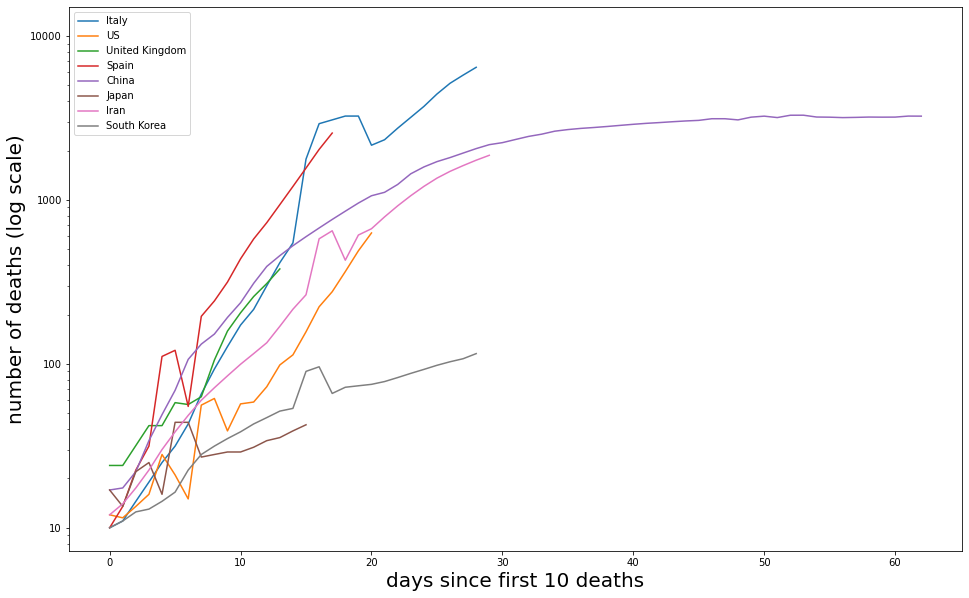

In [21]:
fig, ax = plt.subplots(figsize=(16,10))

country_names = ["Italy","US","United Kingdom","Spain","China","Japan","Iran","South Korea"]  # "Israel"
#country_names = ["America"]

for  country_name in country_names:
    print("c:",country_name)
    country_data = data.copy()
    country_data = country_data[(country_data.country==country_name) & (country_data.deaths>0)]
    country_data.replace(0, np.nan, inplace=True)
         
    daily_deaths_country = country_data.deaths.resample('D').sum()
    daily_deaths_country.replace(0, np.nan, inplace=True)
    
    daily_deaths_country_df = daily_deaths_country.to_frame()
    start_date = daily_deaths_country_df.index[0]
    daily_deaths_country_df['days_count'] = (daily_deaths_country_df.index-start_date).days
    
    days_offset = next(cnt for d,cnt in zip(daily_deaths_country_df.deaths,daily_deaths_country_df.days_count) if d >=10)
    daily_deaths_country_df['days_count'] = daily_deaths_country_df['days_count']-days_offset
    
    daily_deaths_country_df = daily_deaths_country_df[daily_deaths_country_df.days_count>=0]
    daily_deaths_country_df.deaths = daily_deaths_country_df.deaths.rolling("2D").mean()    
    
    plot_timeseries(daily_deaths_country_df,label=country_name,fig=fig,ax=ax)


plt.yscale('log')
plt.legend(loc=0)
plt.ylim((0,15000))
plt.ylabel('number of deaths (log scale)', fontsize=20)
plt.xlabel('days since first 10 deaths', fontsize=20)

ax.yaxis.set_major_formatter(ScalarFormatter())